In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# <center>Applied Economics Analysis:</center>
### <center>King County house pricing prediction model</center>

|Name|examnr.|
|----|-------|
|Delaïah Felipa|256776
|Daan Buijssen|480774|

# Research question:

How well can a regression model predict the house prices?

# Motivation:

Prices of real esate properties are critically linked with the [economy](https://www.kansascityfed.org/publicat/sympos/2007/pdf/shiller_0415.pdf) Changes in the real estate prices affect e.g. various households, bankers, and policy makers. Generally, the values of the houses increase over time and therefore the appraised value need to be calculated. This specific value is required when the houseowners are trying to sell their property, or when they want to apply for a mortage loan or simply for its marketability. The determination of the appraised values is currently being done by professionals, which could be biased due to the vested interest of the mortage broker, buyer, seller or the lender. Creating an automated prediction system can serve as an independent third source party. And in [combination](https://www.cleveroad.com/blog/big-data-real-estate) with the realtor experience, this model can be fine-tuned into a final predictive model. In order to make this prediction model, We gathered our dataset from [kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction/kernels); which is a platform were competition datasets from different companies are being placed. The dataset contains observations of King County, which is a county in US of Washington. As of July 2015, the population was approximately 2.1 million. King county had approximately 890.000 housing units and its median income was USD 8.1916 ([Wu, 2017](https://www.kaggle.com/harlfoxem/housesalesprediction/kernels)).

# Methods:  
The main method that we used in order to create a predition model would be the OLS model (multiple linear regression). As a predictive analysis, this method is used to explain the relationship between explanatory variables and the dependent variable. As [machine learning](https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a) has become prevalent in many industustries that are trying to make prediction models based on historical data, the linear regresion forms the basis of it all. In order to be able to use this regression without biases, it is necessary to test the corresponding [assumptions](#assumptions). 

As we checked for [homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity), it seems that this assumption was violated. Hence, we decided to use a variant of the main method, which is the [robust linear regression method](https://en.wikipedia.org/wiki/Robust_regression). This [type of method](#rlr_method) is largely used to overcome the limitations of the linear regression model. Especially when the homoscedastisity assumption is violated. 


<a id='assumptions'></a>

#  Assumptions:
We took a look into the [distribution](#distribution) of the dependent variable.
In general, the [linear regression method](https://www.statisticssolutions.com/assumptions-of-linear-regression/) has 5 assumptions:
1.  *Linear relationship* states that there should be a [linear relationship](#relationship) between the dependent variable and independent variables. If this is violated, a transformation of the variable is needed.
2.  *Multivariate normality* states that the residuals of the independent variables are normally distributed. And due to the fact that this dataset has a [large number](#number) of observations, we can assume that this assumption has been met.
3.  *No or little multicollinearity*, which occurs when the independent variables are highly correlated with each other. Within this dataset we noticed that this seem to occur, and therefore decided to use the [Variance Inflation Factor](https://en.wikipedia.org/wiki/Variance_inflation_factor) ([VIF](#vif_cm)).
4.  *No auto-correlation*, which is also known as [serial correlation](https://www.dummies.com/education/economics/econometrics/patterns-of-autocorrelation/). And this occurs when the order of observations matter, which isn't the case with our dataset.
5.  *Homoscedasticity*, states that the residuals are equal across the regression line. After fitting our model, we noticed that this doesn't seem to be the case, and therefore decided to go for the [robust regression method](#rlr_method).

We also decided to take a look into the [distribution](#distribution) of the dependent variable. And due to the fact that it is heavily skewed we decided to use the [logarithm](#logarithm) of the price instead for our analysis.

# Answer:
By making use of the train_split option, we were able to create sample sets in order to fit our regression model. Based on the fact that there was multicollinearity, we then adjusted the model by dropping some variables based on a high [pearson correlation](#pearson_correlation) and a large [VIF](#vif_cm) number. The [adjusted model](#adjusted_model) still has some large VIF number. However, we believe that some variables (e.g. bedrooms and sqft_living) need to be kept in the model due to its importance to the future homeowners. Consequently, the final model consists of the following explanatory variables from which one grade dummy is not significant:
- bedrooms
- sqft_living
- sqft_lot
- waterfront
- renovated
- bsmnt_present
- house_age
- rich_area
- grade dummies

The accuracy of this model is checked by looking at the adjusted R-squared, which is at a substantial level of 70%. The R-squared measures the variability in the dependent variable explained by the independent variables. And the adjusted R-squared corrects for the number of variables within the linear regression model.

The results can be found [here](#rlr_method).


# Discussion:

All variables have the sign we expected, except for bedrooms. The coefficient of bedrooms has a negative sign, which is a little bit surprising. However, it might be possible to explain this, because families have become smaller in recent [years](https://www.statista.com/statistics/183657/average-size-of-a-family-in-the-us/). Having extra bedrooms might only be an extra cost, since families don't need as many bedrooms and will have to change the structure of the house.

This model can be a nice tool for families deciding to renovate or sell the house to check what their house might be worth nowadays on the market depending on the houses features. Most families don't have knowledge about valuating a house, with this model they can have an easy objective indication of their house value. Even though the model consists of quite many features, there can be features that are not in the model and still influence the house valuation. Therefore, we suggest to not take the model's valuation as a fact, but only as a suggestive tool.

Since the data is from 2014-2015, the model works best for predicting house values around that time. However, you can easily use the same model when newer datasets become available to get a better prediction for later years.

We used a basic OLS model, thus future research could be focused on using more complex models with stronger predicting powers.

### Importing libraries
In order to make a prediction model we had to import certain libraries such as linear_model from the sklearn package, and variance_inflation_factor from the statsmodel package.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import bartlett
from scipy.stats import norm
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.stats.api as sms
import math
from sklearn import linear_model
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline


C:\Program Files\Anaconda3-5.1.0\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Importing and exploring data
After importing the dataset from [kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction/kernels), we took a look into what it entails by looking at e.g.: the number of columns, rows, and potential missing values. As well as defining the variables of this dataset.

In [3]:
url = 'https://raw.githubusercontent.com/DaanBuijssen/assignments/master/kc_house_data.csv'
df = pd.read_csv(url)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<a id='number'></a>

In [4]:
print("Number of columns: " + str(df.shape[1]))
print("Number of rows: " +str(df.shape[0]))

Number of columns: 21
Number of rows: 21613


Now we check the data for missing values. 

In [5]:
print(df.isnull().any(axis = 1).sum(), 'missing values  / ', len(df))

0 missing values  /  21613


The data contains the following variables:

**id**: a notation for a house

**date**: Date house was sold

**price**: Price is prediction target

**bedrooms**: Number of Bedrooms/House

**bathrooms**: Number of bathrooms/House

**sqft_livingsquare**: footage of the home

**sqft_lotsquare**: footage of the lot

**floors**: Total floors (levels) in house

**waterfront**: House which has a view to a waterfront

**view**: Has been viewed

**condition**: How good the condition is ( Overall )

**grade**: overall grade given to the housing unit, based on King County grading system

**sqft_abovesquare**: footage of house apart from basement

**sqft_basementsquare**: footage of the basement

**yr_built**: Built Year

**yr_renovated**: Year when house was renovated

**zipcode**: zip

**lat**: Latitude coordinate

**long**: Longitude coordinate

**sqft_living15**: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

**sqft_lot15**: lotSize area in 2015(implies-- some renovations)

### Adjusting the dataset and exploring further

After taking an initial look into our data, we decided to drop some variables:
- *latitude and longitude variables*, due to the fact that we didn't want to use the exact location of the houses. We decided to include a categorical variable ([rich_area](#rich_area)) based on the zipcode instead.
- *sqft_living15 and sqft_lot15*, because we wanted to look at the characteristics of the house at the moment of the sale. These variables seem to indicate that there was an evaluation during 2015, even when the house was already sold.
- *id*, is just a unique number related to the house and we don't need it for our analysis.
- *view*. Based on the description that came with the dataset, we canot truly determine what it entials. After looking into this variable, we cannot understand how so many houses can be sold without it being viewed by the potential homeowners. And therefore, decided to drop this variable.

The next step into our pre-processing procedure was to tell python that there was a date variable, and had to adjust it accordingly. After that was done, we made an [analysis](#price_change) to check whether the price changed over time.

In [6]:
df.drop(['lat',
        'long',
        'sqft_living15',
        'sqft_lot15',
         'view',
        'id'], inplace = True, axis = 1)
df.date = pd.to_datetime(df.date)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074


In [7]:
df['date'].describe()

count                   21613
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

The dataset starts at 2 May 2014 and ends at 27 May 2015, so there is data for about 1 year for house sales within King County, USA.


<a id='price_change'></a>

In [8]:
df_tp = df.groupby(['date'], as_index=False)[['price']].mean()

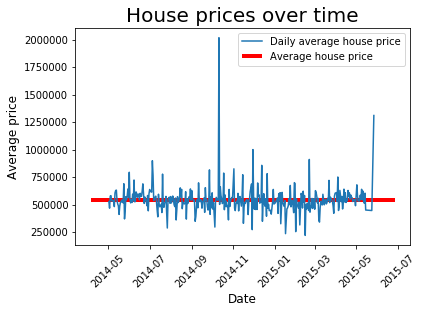

In [9]:
plt.plot(df_tp.date, df_tp.price, label = 'Daily average house price')
plt.hlines(np.mean(df['price']), '2014-04-05', '2015-06-27', color='r', label='Average house price', lw=4)
plt.title('House prices over time', fontsize = 20)
plt.legend(loc = 1)
plt.xlabel('Date', fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel('Average price', fontsize = 12)
plt.show()

In the figure above we see no clear trend in average house prices over time, so we will not use the selling date as an independent variable in our
regression.

<a id='modification'></a>

Next we created a new column based on the yr_renovated variable. We believe that the house prices are more influenced by whether they were renovated or not than the actual year of renovation. Hence, we created a dummy variable named renovated.
After checking the sqft_basement and the sqft_living, we decided to drop the former variable due to our uncertainty. It isn't clearly defined whether sqft_basement is also included in the calculation of sqft_living. And in order to have one less variable that could be causing [multicollinearity](#assumptions), we immediately decided to drop it from our dataset. However, we did create a new variable in its place to indicate whether there is a basement present or not; since we believe that the presence of a basement might have an influence on the house price.
And below we gave an indication of how our dataset has been changed.

<a id='dropped'></a>

In [10]:
df = df[df.bedrooms!=33]
df['renovated'] = np.where(df['yr_renovated'] == 0, 0, 1)
df['bsmnt_present'] = np.where(df['sqft_basement']==0, 0, 1)
df.drop(['yr_renovated', 'sqft_basement'], inplace = True, axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,renovated,bsmnt_present
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,1955,98178,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,1951,98125,1,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,770,1933,98028,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,1965,98136,0,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,1987,98074,0,0


After the [modifications](#modification), we created a table to gain further insight of the data. As we can see in the table below, the average house price during 2014 and 2015 was approximately USD 540.000. And the oldest house within this dataset is from 1900, meanwhile the youngest is from 2015. And after checking the [distribution of the bedrooms](#bedrooms), we decided to [drop](#dropped) this outlier, and therefore we can now see that the maximum number of bedrooms is equal to 11.

<a id='describe'></a>

In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,renovated,bsmnt_present
count,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00
mean,540083.52,3.37,2.11,2079.92,15107.39,1.49,0.01,3.41,7.66,1788.43,1971.01,98077.94,0.04,0.39
std,367135.06,0.91,0.77,918.46,41421.42,0.54,0.09,0.65,1.18,828.09,29.37,53.51,0.20,0.49
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,1.00,1.00,290.00,1900.00,98001.00,0.00,0.00
25%,321837.50,3.00,1.75,1426.50,5040.00,1.00,0.00,3.00,7.00,1190.00,1951.00,98033.00,0.00,0.00
50%,450000.00,3.00,2.25,1910.00,7619.00,1.50,0.00,3.00,7.00,1560.00,1975.00,98065.00,0.00,0.00
75%,645000.00,4.00,2.50,2550.00,10688.25,2.00,0.00,4.00,8.00,2210.00,1997.00,98118.00,0.00,1.00
max,7700000.00,11.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,9410.00,2015.00,98199.00,1.00,1.00


The yr_built variable, is actually not a numerical variable and as such we would have to create dummy variables in order for it to be included in the regression. Hence, We decided to modify this variable in order to have more numerical variables in the regression model. Consequently, we took the difference between 2015 and the year the houses were built. In the end we expect that older houses will have a lower value relative to price.

<a id='last_mod'></a>

In [12]:
df['house_age']=2015-df.yr_built
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,renovated,bsmnt_present,house_age
0,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,3,7,1180,1955,98178,0,0,60
1,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,3,7,2170,1951,98125,1,1,64
2,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,3,6,770,1933,98028,0,0,82
3,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,5,7,1050,1965,98136,0,1,50
4,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,3,8,1680,1987,98074,0,0,28


<a id='rich_area'></a>

Next we computed the rich_area variable, which was based on the zipcode of the houses. We considered a house to be in a rich area if the average house price within the corresponding zipcode was above the [75th percentile](#describe) of the price variable. And based on the outcome, we created a dummy variable to be used in the regression model as we believe that houses in a rich area positively influence the house prices.


In [13]:
df_zipcodeprice = df.groupby(['zipcode'], as_index=False)[['price']].mean()
df.price.mean()
df_zipcodeprice['rich_area'] = np.where(df_zipcodeprice['price'] <= 645000, 0, 1)
df_zipcodeprice.head()

,zipcode,price,rich_area
0,98001,280804.69,0
1,98002,234284.04,0
2,98003,294111.28,0
3,98004,1355927.08,1
4,98005,810164.88,1


In [14]:
df_zipcodeprice.drop(['price'], inplace = True, axis = 1)
df_zipcodeprice.head()

,zipcode,rich_area
0,98001,0
1,98002,0
2,98003,0
3,98004,1
4,98005,1


Now that we have created a dataframe where the rich_area variable corresponds with the zipcode, we merged this dataframe with the [last modified dataframe](#last_mod). The new dataframe can be seen below.

<a id='latest_mod'></a>

In [15]:
df_merged=pd.merge(df, df_zipcodeprice, how='left', on=['zipcode'])
df_merged.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,renovated,bsmnt_present,house_age,rich_area
0,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,3,7,1180,1955,98178,0,0,60,0
1,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,3,7,2170,1951,98125,1,1,64,0
2,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,3,6,770,1933,98028,0,0,82,0
3,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,5,7,1050,1965,98136,0,1,50,0
4,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,3,8,1680,1987,98074,0,0,28,1


### Checking for correlation between the explanatory variables

Checking for correlations between the variables that are going to be inserted in the regression model is necessary, and also the first [assumption](#assumptions). This is due the fact that multicollinearity can cause problems for your regression model. In other words, independent variables should be independent. And in order to see whether the correlations are high enough you can check by using VIF ([VIF complete model](#vif_cm), [VIF adjusted model](#vif_am)). If we encounter multicollineary, we can try solving it by using one of the many [solutions](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)

<a id='pearson_correlation'></a>

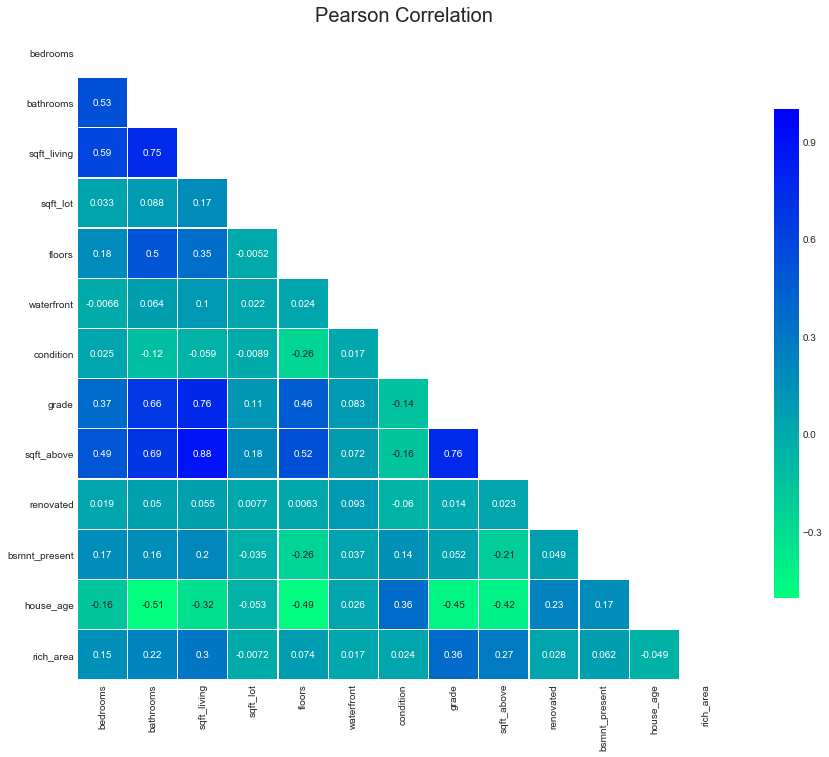

In [16]:
df_pearson = df_merged
df_pearson.drop(['yr_built', 'zipcode'], inplace = True, axis = 1)
features = df_pearson.iloc[:,2:].columns.tolist() 
mask = np.zeros_like(df_pearson[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
sns.set_style(style = "white")

plt.subplots(figsize = (16,12))
sns.heatmap(df_pearson[features].corr(), linewidths = 0.25, vmax = 1.0, square = True,
            cmap = "winter_r", linecolor = 'w', annot = True, mask = mask,
            cbar_kws = {"shrink": .75})
plt.title("Pearson Correlation", fontsize = 20)
plt.show()


<a id='relationship'></a>

### Graphical relationship exploration between dependent and independent variables

In order to check for a relationship between the dependent and explanatory variables, we needed to change some variables into dummies. The condition and grade variables, are actually categorical variables (e.g.: going from 1 to 2, isn't necessarily the same as going from 2 to 3). Therefore, we need to create dummy variables. More information about these variables can be found on the [King County site](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) (Building Grade and Building Condition).

In [17]:
dummies = pd.get_dummies(df_merged['grade']).rename(columns=lambda x: 'grade_' + str(x))
df_merged = pd.concat([df_merged, dummies], axis=1)
df_merged = df_merged.drop(['grade'], axis=1)
dummies2 = pd.get_dummies(df_merged['condition']).rename(columns=lambda x: 'condition_' + str(x))
df_merged = pd.concat([df_merged, dummies2], axis=1)
df_merged = df_merged.drop(['condition'], axis=1)
df_merged.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
sqft_above                int64
renovated                 int32
bsmnt_present             int32
house_age                 int64
rich_area                 int32
grade_1                   uint8
grade_3                   uint8
grade_4                   uint8
grade_5                   uint8
grade_6                   uint8
grade_7                   uint8
grade_8                   uint8
grade_9                   uint8
grade_10                  uint8
grade_11                  uint8
grade_12                  uint8
grade_13                  uint8
condition_1               uint8
condition_2               uint8
condition_3               uint8
condition_4               uint8
condition_5               uint8
dtype: object

As we have indicated with the [graph](#price_change) of price changes over time, the price does not have a clear trend over time. And therefore, we are modifying our [latest dataframe](#latest_mod), by dropping the 'date' variable. Afterwards, we created multiple graphs to show the relationship between the explanatory variables and the dependent variable.

In [18]:
df_merged.drop(['date'], axis=1, inplace=True)
df_merged.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,renovated,bsmnt_present,...,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5
0,221900.00,3,1.00,1180,5650,1.00,0,1180,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.00,3,2.25,2570,7242,2.00,0,2170,1,1,...,0,0,0,0,0,0,0,1,0,0
2,180000.00,2,1.00,770,10000,1.00,0,770,0,0,...,0,0,0,0,0,0,0,1,0,0
3,604000.00,4,3.00,1960,5000,1.00,0,1050,0,1,...,0,0,0,0,0,0,0,0,0,1
4,510000.00,3,2.00,1680,8080,1.00,0,1680,0,0,...,0,0,0,0,0,0,0,1,0,0


The first 9 plots are showing the distribution of the average house prices across the dummy variables within the dataframe. We can conclude that the price rises, when it is expected. E.g.: the price is higher when there is a house with a larger amount of bathrooms or bedrooms, and having a waterfront also seems to be influencing the average price positively. 

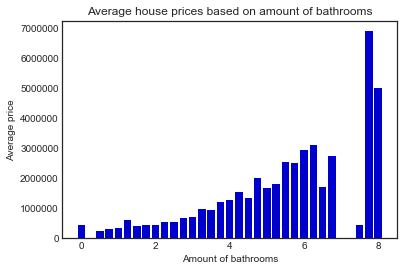

In [19]:
df_bathrooms = df_merged.groupby(['bathrooms'], as_index=False)[['price']].mean()
plt.bar(df_bathrooms['bathrooms'], df_bathrooms['price'], color='mediumblue', width=0.2)
plt.title('Average house prices based on amount of bathrooms')
plt.xlabel('Amount of bathrooms')
plt.ylabel('Average price')
plt.show()

<a id='bedrooms'></a>

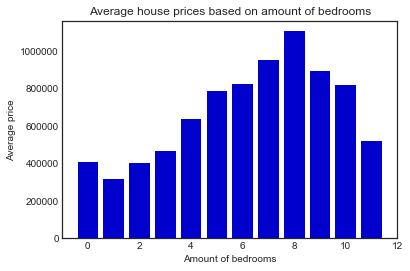

In [20]:
df_bedrooms = df_merged.groupby(['bedrooms'], as_index=False)[['price']].mean()
plt.bar(df_bedrooms['bedrooms'], df_bedrooms['price'], color='mediumblue')
plt.title('Average house prices based on amount of bedrooms')
plt.xlabel('Amount of bedrooms')
plt.ylabel('Average price')
plt.show()

In the figure 'Average house prices based on amount of bedrooms', we saw 1 outlier with 33 bedrooms and therefore decided to [drop](#dropped) this observation. Note that the figure has been updated without that observation.

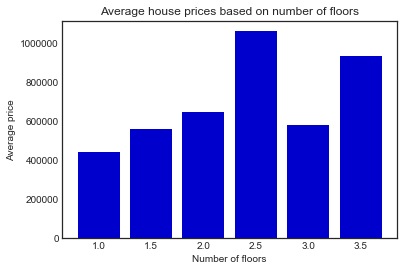

In [21]:
df_floors = df_merged.groupby(['floors'], as_index=False)[['price']].mean()
plt.bar(df_floors['floors'], df_floors['price'], color='mediumblue', width=0.4)
plt.title('Average house prices based on number of floors')
plt.xlabel('Number of floors')
plt.ylabel('Average price')
plt.show()

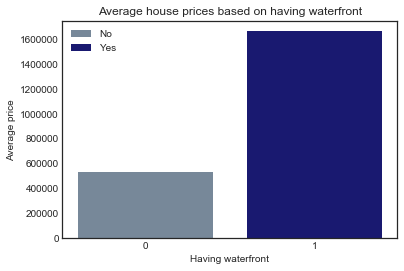

In [22]:
df_waterfront = df_merged.groupby(['waterfront'], as_index=False)[['price']].mean()
w0 = df_waterfront[df_waterfront['waterfront']==0]
w1 = df_waterfront[df_waterfront['waterfront']==1]
plt.bar(w0.index.values, w0['price'], color='lightslategrey', label='No')
plt.bar(w1.index.values, w1['price'], color='midnightblue', label='Yes')
plt.legend()
plt.title('Average house prices based on having waterfront')
plt.xlabel('Having waterfront')
plt.ylabel('Average price')
plt.xticks([0, 1])
plt.show()

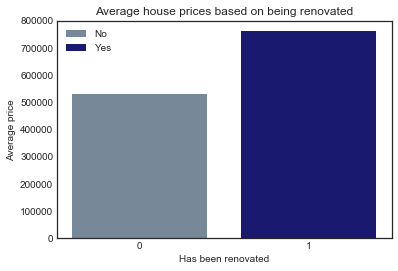

In [23]:
df_renovated = df_merged.groupby(['renovated'], as_index=False)[['price']].mean()
r0 = df_renovated[df_renovated['renovated']==0]
r1 = df_renovated[df_renovated['renovated']==1]
plt.bar(r0.index.values, r0['price'], color='lightslategrey', label='No')
plt.bar(r1.index.values, r1['price'], color='midnightblue', label='Yes')
plt.legend()
plt.title('Average house prices based on being renovated')
plt.xlabel('Has been renovated')
plt.ylabel('Average price')
plt.xticks([0, 1])
plt.show()

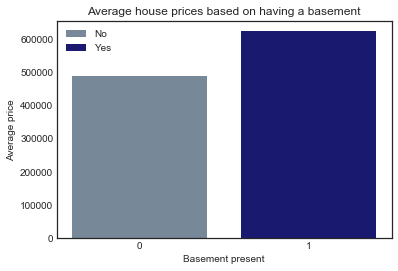

In [24]:
df_bsmnt = df_merged.groupby(['bsmnt_present'], as_index=False)[['price']].mean()
b0 = df_bsmnt[df_bsmnt['bsmnt_present']==0]
b1 = df_bsmnt[df_bsmnt['bsmnt_present']==1]
plt.bar(b0.index.values, b0['price'], color='lightslategrey', label='No')
plt.bar(b1.index.values, b1['price'], color='midnightblue', label='Yes')
plt.legend()
plt.title('Average house prices based on having a basement')
plt.xlabel('Basement present')
plt.ylabel('Average price')
plt.xticks([0,1])
plt.show()

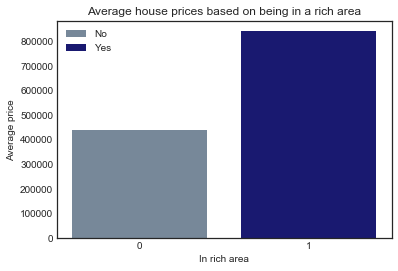

In [25]:
df_rich = df_merged.groupby(['rich_area'], as_index=False)[['price']].mean()
ri0 = df_rich[df_rich['rich_area']==0]
ri1 = df_rich[df_rich['rich_area']==1]
plt.bar(ri0.index.values, ri0['price'], color='lightslategrey', label='No')
plt.bar(ri1.index.values, ri1['price'], color='midnightblue', label='Yes')
plt.legend()
plt.title('Average house prices based on being in a rich area')
plt.xlabel('In rich area')
plt.ylabel('Average price')
plt.xticks([0, 1])
plt.show()

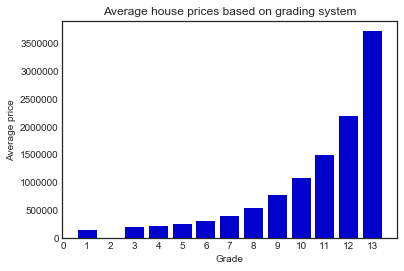

In [26]:
df_grade = df.groupby(['grade'], as_index=False)[['price']].mean()
plt.bar(df_grade['grade'], df_grade['price'], color='mediumblue')
plt.title('Average house prices based on grading system')
plt.xlabel('Grade')
plt.ylabel('Average price')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.show()

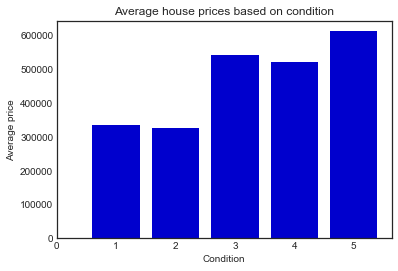

In [27]:
df_condition = df.groupby(['condition'], as_index=False)[['price']].mean()
plt.bar(df_condition['condition'], df_condition['price'], color='mediumblue')
plt.title('Average house prices based on condition')
plt.xlabel('Condition')
plt.ylabel('Average price')
plt.xticks([0,1,2,3,4,5])
plt.show()

The 4 plots below are showing the relationship between the house price and numerical variables. Besides, sqft_lot and house_age variables, the rest do seem to have a linear relationship. We can see that there is a downward trend of the price compared to the house_age variable, but after a certain age it seems to be increasing. A possible explanation for this could be that after a certain age, the houses are deemed antique and therefore are more valuable. 

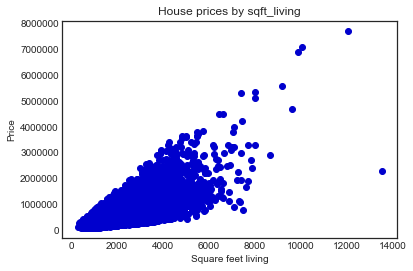

In [28]:
plt.scatter(df_merged.sqft_living, df_merged.price, color='mediumblue')
plt.title('House prices by sqft_living')
plt.xlabel('Square feet living')
plt.ylabel('Price')
plt.show()

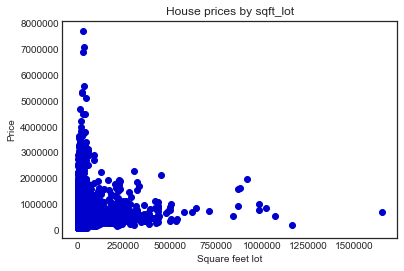

In [29]:
plt.scatter(df_merged.sqft_lot, df_merged.price, color='mediumblue')
plt.title('House prices by sqft_lot')
plt.xlabel('Square feet lot')
plt.ylabel('Price')
plt.show()

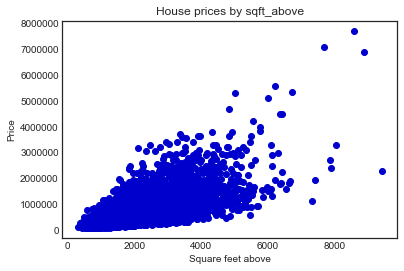

In [30]:
plt.scatter(df_merged.sqft_above, df_merged.price, color='mediumblue')
plt.title('House prices by sqft_above')
plt.xlabel('Square feet above')
plt.ylabel('Price')
plt.show()

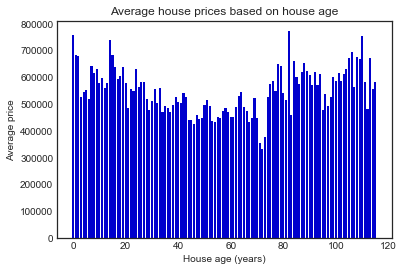

In [31]:
df_house_age = df_merged.groupby(['house_age'], as_index=False)[['price']].mean()
plt.bar(df_house_age['house_age'], df_house_age['price'], color='mediumblue')
plt.title('Average house prices based on house age')
plt.xlabel('House age (years)')
plt.ylabel('Average price')
plt.show()

In order to see how the price is distributed, we decided to make a histogram. As the price variable is going to be our target, we would want to have a normally distributed variable. Otherwise, the prediction could be skewed as well. Therefore, we [normalized](#logarithm) the price variable, before making our prediction models.

<a id='distribution'></a>

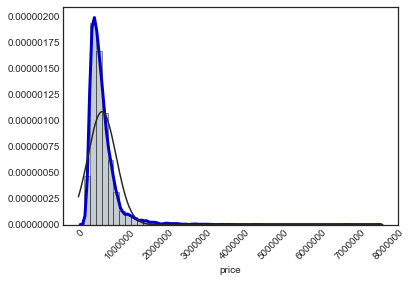

In [32]:
sns.distplot(df.price, fit = norm, hist=True, kde=True, 
             color = 'mediumblue',
             hist_kws={'edgecolor':'black', 'color':'slategrey'},
             kde_kws={'linewidth': 3})
plt.xticks(rotation=45)
plt.show()

In [33]:
print('Skewness: ', skew(df.price))
print( 'Kurtosis: ', kurtosis(df.price))

Skewness:  4.023754298653168
Kurtosis:  34.57598358418086


### Testing for best suited model

We test two models: one model with all the variables and one adjusted model where we remove some variables to decrease multicollinearity. The goal of the test is to compare the models on RMSE, R-Squared and adjusted R-Squared. The RMSE should be as low as possible and the R-Squared and adjusted R-Squared should be as high as possible.

Also, we split the data in a training part and a test part. The training data is used to estimate the model and the test data is used to test how well the model fits in data not used for the estimation itself. We are most interested in the R-Squared and adjusted R-Squared from the test data than from the training data.

In [34]:
independent_variables = df_merged.drop(['price', 'grade_1', 'condition_1'], axis=1)
independent_variables.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,renovated,bsmnt_present,house_age,...,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,condition_2,condition_3,condition_4,condition_5
0,3,1.00,1180,5650,1.00,0,1180,0,0,60,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2.00,0,2170,1,1,64,...,0,0,0,0,0,0,0,1,0,0
2,2,1.00,770,10000,1.00,0,770,0,0,82,...,0,0,0,0,0,0,0,1,0,0
3,4,3.00,1960,5000,1.00,0,1050,0,1,50,...,0,0,0,0,0,0,0,0,0,1
4,3,2.00,1680,8080,1.00,0,1680,0,0,28,...,1,0,0,0,0,0,0,1,0,0


<a id='logarithm'></a>

In [35]:
df_merged['lprice'] = np.log(df_merged['price'])
df_merged.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,renovated,bsmnt_present,...,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5,lprice
0,221900.00,3,1.00,1180,5650,1.00,0,1180,0,0,...,0,0,0,0,0,0,1,0,0,12.31
1,538000.00,3,2.25,2570,7242,2.00,0,2170,1,1,...,0,0,0,0,0,0,1,0,0,13.20
2,180000.00,2,1.00,770,10000,1.00,0,770,0,0,...,0,0,0,0,0,0,1,0,0,12.10
3,604000.00,4,3.00,1960,5000,1.00,0,1050,0,1,...,0,0,0,0,0,0,0,0,1,13.31
4,510000.00,3,2.00,1680,8080,1.00,0,1680,0,0,...,0,0,0,0,0,0,1,0,0,13.14


In [36]:
X = independent_variables
X = sm.add_constant(X)
y = df_merged.lprice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

We calculate the adjusted R-squared based on the following formula: 
    
$$\bar{R}^2 = 1 - (1-R^2)*\frac{(n-1)}{n-(k+1)}$$

In [37]:
def adjustedR2(r2,n,k):
    return 1-(1-r2)*(n-1)/(n-(k+1))

In [38]:
#CM is complete model (all variables)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
rmsecm = format(np.sqrt(metrics.mean_squared_error(y_test,predictions)),'.3f')
rtrcm = format(reg.score(X_train, y_train),'.3f')
rtecm = format(reg.score(X_test, y_test),'.3f')
artrcm = format(adjustedR2(reg.score(X_train,y_train),
                            X_train.shape[0],independent_variables.shape[1]),'.3f')
artecm = format(adjustedR2(reg.score(X_test,y_test),
                            X_test.shape[0],independent_variables.shape[1]),'.3f')


In [39]:
evaluation = pd.DataFrame({'Model': [],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]},
                         columns = ['Model', 'Root Mean Squared Error (RMSE)',
                                   'R-squared (training)', 'Adjusted R-Squared(training)',
                                   'R-squared (test)', 'Adjusted R-squared (test)'])

In [40]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Complete Model',rmsecm,rtrcm,artrcm,rtecm,artecm]
evaluation

,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-Squared(training),R-squared (test),Adjusted R-squared (test)
0,Complete Model,0.274,0.716,0.715,0.724,0.722


<a id='vif_cm'></a>

In [41]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]
vif["features"] = independent_variables.columns
vif

,VIF Factor,features
0,26.19,bedrooms
1,29.47,bathrooms
2,102.86,sqft_living
3,1.21,sqft_lot
4,16.92,floors
5,1.05,waterfront
6,93.29,sqft_above
7,1.21,renovated
8,5.76,bsmnt_present
9,6.87,house_age


We will drop condition, since it's too similar to grade and the VIF are high from condition

We drop sqft_above, because it has a high VIF + a high [Pearson Correlation](#pearson_correlation) with sqft_living. We believe it makes more sense to keep sqft_living, because we believe people are more interested in total living space than about living space above. For the same reason we also drop floors

Lastly, we drop bathrooms, because it has a high [Pearson Correlation](#pearson_correlation) with sqft_living and quite high VIF. Also, if there are many bedrooms, it's probably a house for a larger family, which means they need more bathrooms.

<a id='adjusted_model'></a>

In [42]:
independent_variables1 = independent_variables.drop(['sqft_above', 'condition_2', 'condition_3', 'condition_4', 'condition_5',
                                                    'bathrooms', 'floors'], axis=1)
independent_variables1.head()

,bedrooms,sqft_living,sqft_lot,waterfront,renovated,bsmnt_present,house_age,rich_area,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,3,1180,5650,0,0,0,60,0,0,0,0,0,1,0,0,0,0,0,0
1,3,2570,7242,0,1,1,64,0,0,0,0,0,1,0,0,0,0,0,0
2,2,770,10000,0,0,0,82,0,0,0,0,1,0,0,0,0,0,0,0
3,4,1960,5000,0,0,1,50,0,0,0,0,0,1,0,0,0,0,0,0
4,3,1680,8080,0,0,0,28,1,0,0,0,0,0,1,0,0,0,0,0


<a id='vif_am'></a>

In [43]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(independent_variables1.values, i) for i in range(independent_variables1.shape[1])]
vif["features"] = independent_variables1.columns
vif

,VIF Factor,features
0,25.12,bedrooms
1,24.24,sqft_living
2,1.19,sqft_lot
3,1.04,waterfront
4,1.14,renovated
5,1.95,bsmnt_present
6,4.95,house_age
7,1.59,rich_area
8,1.00,grade_3
9,1.02,grade_4


In [44]:
X = independent_variables1
X = sm.add_constant(X)
y = df_merged.lprice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
#ad is adjusted model  (all variables)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
rmsead = format(np.sqrt(metrics.mean_squared_error(y_test,predictions)),'.3f')
rtrad = format(reg.score(X_train, y_train),'.3f')
rtead = format(reg.score(X_test, y_test),'.3f')
artrad = format(adjustedR2(reg.score(X_train,y_train),
                            X_train.shape[0],independent_variables1.shape[1]),'.3f')
artead = format(adjustedR2(reg.score(X_test,y_test),
                            X_test.shape[0],independent_variables1.shape[1]),'.3f')

In [45]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Adjusted model',rmsead,rtrad,artrad,rtead,artead]
evaluation

,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-Squared(training),R-squared (test),Adjusted R-squared (test)
0,Complete Model,0.274,0.716,0.715,0.724,0.722
1,Adjusted model,0.284,0.698,0.697,0.703,0.702


In the adjusted model the VIF scores are much lower, so the risk for multicollinearity is lower. At the same time the RMSE, R-squared and adjusted R-squared did not change much, so the predicting power of the adjusted model is about the same as the complete model. Therefore, we believe it is better to use the adjusted model.

### Regression result

We estimate the following model using OLS regression:

$\mathrm{lprice_i = constant + \beta_1 bedrooms_i + \beta_2 sqft\_living_i + \beta_3 sqft\_lot_i + \beta_4 waterfront_i +\beta_5 renovated_i + \beta_6 bsmnt\_present_i + \beta_7 house\_age_i + \beta_8 rich\_area_i + \beta_9 grade\_3_i + \beta_{10} grade\_4_i + \beta_{11} grade\_5_i + \beta_{12} grade\_6_i + \beta_{13} grade\_7_i + \beta_{14}grade\_8_i + \beta_{15} grade\_9_i + \beta_{16} grade\_10_i + \beta_{17} grade\_11_i + \beta_{18} grade\_12_i + \beta_{19} grade\_13_i + \varepsilon_i}$

In [46]:
X = independent_variables1
X = sm.add_constant(X)
y = df_merged.lprice
adjusted_model = sm.OLS(y, X).fit()
adjusted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2638.
Date:                Mon, 28 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:01:43   Log-Likelihood:                -3838.9
No. Observations:               21612   AIC:                             7718.
Df Residuals:                   21592   BIC:                             7877.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.5826      0.289     40.054      0.000      11.016      12.149
bedrooms         -0.0246      0.003     -8.710      0.000      -0.030      -0.019
sqft_living       0.0002   4.26e-06     49.117      0.000       0.000       0.000
sqft_lot       9.965e-08   4.87e-08      2.045      0.041    4.15e-09    1.95e-07
waterfront        0.5540      0.023     23.964      0.000       0.509       0.599
renovated         0.0448      0.010      4.384      0.000       0.025       0.065
bsmnt_present     0.0630      0.004     14.370      0.000       0.054       0.072
house_age         0.0042   8.27e-05     50.729      0.000       0.004       0.004
rich_area         0.3305      0.005     67.027      0.000       0.321       0.340
grade_3           0.1034      0.334      0.310      0.757      -0.551       0.758
grade_4           0.1575      0.294      0.536      0.592      -0.419       0.734
grade_5           0.2357      0.290      0.813      0.416      -0.332       0.804
grade_6           0.4289      0.289      1.483      0.138      -0.138       0.996
grade_7           0.6854      0.289      2.370      0.018       0.118       1.252
grade_8           0.9076      0.289      3.137      0.002       0.341       1.475
grade_9           1.1045      0.289      3.817      0.000       0.537       1.672
grade_10          1.2188      0.290      4.209      0.000       0.651       1.786
grade_11          1.3513      0.290      4.662      0.000       0.783       1.919
grade_12          1.4349      0.291      4.925      0.000       0.864       2.006
grade_13          1.4713      0.301      4.886      0.000       0.881       2.061
==============================================================================
Omnibus:                       95.298   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.192
Skew:                          -0.111   Prob(JB):                     1.95e-24
Kurtosis:                       3.268   Cond. No.                     2.25e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
name1 = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test1 = sms.het_breuschpagan(adjusted_model.resid, adjusted_model.model.exog)
bptest = pd.DataFrame({'Lagrange multiplier statistic': [],
                           'p-value':[],
                           'f-value':[],
                           'f p-value':[]},
                         columns = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

In [48]:
bp = bptest.shape[0]
bptest.loc[bp] = test1
bptest

,Lagrange multiplier statistic,p-value,f-value,f p-value
0,678.53,0.00,36.84,0.00


The Breusch-Pagan test indicates that there is heteroskedasticity. Therefore, we do a new regression with robust standard errors.

<a id='rlr_method'></a>

In [49]:
results_robust = adjusted_model.get_robustcov_results(cov_type='HC1')
results_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                 2.391e+04
Date:                Mon, 28 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:01:44   Log-Likelihood:                -3838.9
No. Observations:               21612   AIC:                             7718.
Df Residuals:                   21592   BIC:                             7877.
Df Model:                          19                                         
Covariance Type:                  HC1                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.5826      0.005   2402.647      0.000      11.573      11.592
bedrooms         -0.0246      0.003     -8.250      0.000      -0.030      -0.019
sqft_living       0.0002   4.94e-06     42.360      0.000       0.000       0.000
sqft_lot       9.965e-08   5.98e-08      1.665      0.096   -1.77e-08    2.17e-07
waterfront        0.5540      0.027     20.181      0.000       0.500       0.608
renovated         0.0448      0.011      4.168      0.000       0.024       0.066
bsmnt_present     0.0630      0.004     14.323      0.000       0.054       0.072
house_age         0.0042   8.33e-05     50.420      0.000       0.004       0.004
rich_area         0.3305      0.004     73.517      0.000       0.322       0.339
grade_3           0.1034      0.324      0.319      0.749      -0.531       0.738
grade_4           0.1575      0.088      1.783      0.075      -0.016       0.331
grade_5           0.2357      0.029      8.264      0.000       0.180       0.292
grade_6           0.4289      0.010     43.426      0.000       0.410       0.448
grade_7           0.6854      0.009     78.486      0.000       0.668       0.703
grade_8           0.9076      0.010     91.298      0.000       0.888       0.927
grade_9           1.1045      0.012     88.743      0.000       1.080       1.129
grade_10          1.2188      0.016     76.008      0.000       1.187       1.250
grade_11          1.3513      0.022     60.396      0.000       1.307       1.395
grade_12          1.4349      0.039     36.355      0.000       1.358       1.512
grade_13          1.4713      0.098     14.940      0.000       1.278       1.664
==============================================================================
Omnibus:                       95.298   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.192
Skew:                          -0.111   Prob(JB):                     1.95e-24
Kurtosis:                       3.268   Cond. No.                     2.25e+07
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 2.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We use a log-linear model, we can interpret the results by calculating $(e^\beta - 1) * 100$% for every variable.

In [50]:
def calc(beta):
    return (math.exp(beta)-1)*100

In [51]:
print("If bedrooms goes up by 1, price is expected to decrease by {:.3f}%".format(calc(0.0246)))
print("If sqft_living goes up by 1, price is expected to increase by {:.3f}%".format(calc(0.0002))) 
print("If sqft_lot goes up by 1, price is expected to increase by {:.6f}%".format(calc(0.000000009965))) 
print("If there is a view to a waterfront, price is expected to be {:.3f}% higher".format(calc(0.554))) 
print("If the house is renovated, price is expected to be {:.3f}% higher".format(calc(0.0448))) 
print("If there is a basement present, price is expected to be {:.3f}% higher".format(calc(0.063))) 
print("If the age of the house goes up by 1, price is expected to increase by {:.3f}%".format(calc(0.0042)))
print("If the house is located in a rich area, price is expected to be {:.3f}% higher".format(calc(0.3305))) 
print("If the grade of the house is 3, price is expected to be {:.3f}% higher than a house with grade 1".format(calc(0.1034)))
print("If the grade of the house is 4, price is expected to be {:.3f}% higher than a house with grade 1".format(calc(0.1575)))
print("If the grade of the house is 5, price is expected to be {:.3f}% higher than a house with grade 1".format(calc(0.2357))) 
print("If the grade of the house is 6, price is expected to be {:.3f}% higher than a house with grade 1".format(calc(0.4289))) 
print("If the grade of the house is 7, price is expected to be {:.3f}% higher than a house with grade 1".format(calc(0.6854))) 
print("If the grade of the house is 8, price is expected to be {:.3f}% higher than a house with grade 1".format(calc(0.9076))) 
print("If the grade of the house is 9, price is expected to be {:.3f}% higher than a house with grade 1".format(calc(1.1045))) 
print("If the grade of the house is 10, price is expected to be {:.3f}% higher than a house with grade 1".format(calc(1.2188)))
print("If the grade of the house is 11, price is expected to be {:.3f}% higher than a house with grade 1".format(calc(1.3513))) 
print("If the grade of the house is 12, price is expected to be {:.3f}% higher than a house with grade 1".format(calc(1.4349))) 
print("If the grade of the house is 13, price is expected to be {:.3f}% higher than a house with grade 1".format(calc(1.4713)))

If bedrooms goes up by 1, price is expected to decrease by 2.491%
If sqft_living goes up by 1, price is expected to increase by 0.020%
If sqft_lot goes up by 1, price is expected to increase by 0.000001%
If there is a view to a waterfront, price is expected to be 74.020% higher
If the house is renovated, price is expected to be 4.582% higher
If there is a basement present, price is expected to be 6.503% higher
If the age of the house goes up by 1, price is expected to increase by 0.421%
If the house is located in a rich area, price is expected to be 39.166% higher
If the grade of the house is 3, price is expected to be 10.893% higher than a house with grade 1
If the grade of the house is 4, price is expected to be 17.058% higher than a house with grade 1
If the grade of the house is 5, price is expected to be 26.579% higher than a house with grade 1
If the grade of the house is 6, price is expected to be 53.557% higher than a house with grade 1
If the grade of the house is 7, price is 

All coefficients are statistically significant at the 1%-level, except for grade_3 which is not significant and grade_4 + sqft_lot are statistically significant at the 10%-level.